In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [129]:
!pip install tensorflow

In [131]:
data = pd.read_csv('/content/drive/MyDrive/NNDL/GPU_benchmarks_v7.csv')
df=data.copy()

In [132]:
df.head(10)

,gpuName,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category
0,GeForce RTX 3090 Ti,29094,1117,2099.99,13.85,450.0,64.65,2022,Unknown
1,GeForce RTX 3080 Ti,26887,1031,1199.99,22.41,350.0,76.82,2021,Desktop
2,GeForce RTX 3090,26395,999,1749.99,15.08,350.0,75.41,2020,Desktop
3,Radeon RX 6900 XT,25458,1102,1120.31,22.72,300.0,84.86,2020,Desktop
4,GeForce RTX 3080,24853,1003,999.00,24.88,320.0,77.66,2020,Desktop
5,GeForce RTX 3070 Ti,23367,1003,749.99,31.16,290.0,80.58,2021,Desktop
6,Radeon RX 6800 XT,23364,1078,859.00,27.20,300.0,77.88,2020,Desktop
7,RTX A5000,22867,984,2631.20,8.69,230.0,99.42,2021,Workstation
8,RTX A6000,22122,832,4999.99,4.42,300.0,73.74,2021,Workstation
9,GeForce RTX 3070,22093,969,719.99,30.69,220.0,100.42,2020,Desktop


In [144]:
df=df.drop(['category'],axis=1,)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           2317 non-null   object 
 1   G3Dmark           2317 non-null   int64  
 2   G2Dmark           2317 non-null   int64  
 3   price             2317 non-null   float64
 4   gpuValue          2317 non-null   float64
 5   TDP               2317 non-null   float64
 6   powerPerformance  2317 non-null   float64
 7   testDate          2317 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 144.9+ KB


In [146]:
df.columns

Index(['gpuName', 'G3Dmark', 'G2Dmark', 'price', 'gpuValue', 'TDP',
       'powerPerformance', 'testDate'],
      dtype='object')

In [147]:
df.isna().sum()

,0
gpuName,0
G3Dmark,0
G2Dmark,0
price,0
gpuValue,0
TDP,0
powerPerformance,0
testDate,0


In [148]:
df['price']=df['price'].fillna(df['price'].mean())
df['gpuValue']=df['gpuValue'].fillna(df['gpuValue'].mean())
df['TDP']=df['TDP'].fillna(df['TDP'].mean())
df['powerPerformance']=df['powerPerformance'].fillna(df['powerPerformance'].mean())

In [149]:
X = df.drop(['gpuName'], axis=1)
y = df['gpuName']

numerical_features = X.select_dtypes(include=['number']).columns

scaler = MinMaxScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

encoder = OneHotEncoder(handle_unknown='ignore')
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1)).toarray()

X_preprocessed = pd.DataFrame(X, columns=X.columns)
y_preprocessed = pd.DataFrame(y_encoded, columns=encoder.get_feature_names_out(['gpuName']))
# Now, X_preprocessed contains normalized features and y_preprocessed contains one-hot encoded labels.

X.head()

,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate
0,1.000000,1.000000,0.231864,0.198623,0.899112,0.314796,1.000000
1,0.924140,0.922523,0.131658,0.321382,0.697337,0.374637,0.923077
2,0.907229,0.893694,0.192895,0.216263,0.697337,0.367704,0.846154
3,0.875021,0.986486,0.122787,0.325828,0.596449,0.414171,0.846154
4,0.854226,0.897297,0.109280,0.356805,0.636804,0.378768,0.846154


In [150]:
input_shape = (df.shape[1] - 1,)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(df['gpuName'].unique()), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                     │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 2317)                │         150,605 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,885 (624.55 KB)

 Trainable params: 159,885 (624.55 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
# X_preprocessed = X_preprocessed.select_dtypes(exclude=['object'])

In [152]:
X_preprocessed.isna().sum()

,0
G3Dmark,0
G2Dmark,0
price,0
gpuValue,0
TDP,0
powerPerformance,0
testDate,0


In [153]:
X_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   G3Dmark           2317 non-null   float64
 1   G2Dmark           2317 non-null   float64
 2   price             2317 non-null   float64
 3   gpuValue          2317 non-null   float64
 4   TDP               2317 non-null   float64
 5   powerPerformance  2317 non-null   float64
 6   testDate          2317 non-null   float64
dtypes: float64(7)
memory usage: 126.8 KB


In [154]:
X_np = X_preprocessed.values

def forward_propagation(X, model):

  # Performs forward propagation for the given model and input data.

  # Args:
  #   X: Input data (features) as a NumPy array.
  #   model: The Keras model.

  # Returns:
  #   Predictions from the model.

  layer_outputs = []
  current_input = X # Changed from X_np to X to use the input provided to the function

  for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]

    # Calculate the dot product first, then add the bias
    output = np.dot(current_input, weights) + biases

    if layer.activation is not None:
      output = layer.activation(output)

    layer_outputs.append(output)
    current_input = output

  return current_input

predictions = forward_propagation(X_np, model)

print(predictions)

tf.Tensor(
[[0.0004317  0.00041486 0.00042375 ... 0.00042187 0.00043417 0.00042648]
 [0.00043258 0.0004151  0.000425   ... 0.00042203 0.00043225 0.00042699]
 [0.00043222 0.00041582 0.00042505 ... 0.00042187 0.00043218 0.00042619]
 ...
 [0.0004365  0.00043229 0.0004307  ... 0.00042828 0.00043302 0.0004297 ]
 [0.00043638 0.00043059 0.00043029 ... 0.00042928 0.00043323 0.00042869]
 [0.0004365  0.00043228 0.00043069 ... 0.00042829 0.00043302 0.00042969]], shape=(2317, 2317), dtype=float64)


In [156]:
def softmax_derivative(output):
    # Compute the derivative of softmax
    return output * (1 - output)

def relu_derivative(output):
    # Derivative of ReLU
    return np.where(output > 0, 1, 0)

def backpropagation(X, y, model, learning_rate):
    # Forward pass
    layer_outputs = []
    current_input = X
    for layer in model.layers:
        weights, biases = layer.get_weights()
        output = np.dot(current_input, weights) + biases
        if layer.activation == tf.keras.activations.relu:
            output = np.maximum(0, output)
        elif layer.activation == tf.keras.activations.softmax:
            output = np.exp(output) / np.sum(np.exp(output), axis=1, keepdims=True)
        layer_outputs.append(output)
        current_input = output

    # Loss calculation (categorical cross-entropy derivative)
    y_pred = layer_outputs[-1]
    output_error = y_pred - y  # Derivative of categorical crossentropy with respect to softmax

    # Backward pass (updating weights and biases)
    for layer_idx in reversed(range(len(model.layers))):
        layer = model.layers[layer_idx]
        weights, biases = layer.get_weights()
        layer_output = layer_outputs[layer_idx]

        if layer_idx > 0:
            prev_layer_output = layer_outputs[layer_idx - 1]
        else:
            prev_layer_output = X

        # Calculate gradients
        weight_gradient = np.dot(prev_layer_output.T, output_error)
        bias_gradient = np.sum(output_error, axis=0)

        # Update weights and biases
        weights -= learning_rate * weight_gradient
        biases -= learning_rate * bias_gradient
        layer.set_weights([weights, biases])

        if layer_idx > 0:
            output_error = np.dot(output_error, weights.T)
            if layer.activation == tf.keras.activations.relu:
                output_error *= relu_derivative(prev_layer_output)

    return model

updated_model = backpropagation(X_np, y_preprocessed, model, 0.01)

In [158]:
from keras.optimizers import SGD, Adam

sgd_optimizer = SGD(learning_rate=0.01)
adam_optimizer = Adam(learning_rate=0.001)  # You can adjust the learning rate

# Function to update weights with SGD
def update_weights_sgd(X, y, model, optimizer):
  with tf.GradientTape() as tape:
    predictions = model(X)
    loss = tf.keras.losses.CategoricalCrossentropy()(y, predictions)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

# Function to update weights with Adam
def update_weights_adam(X, y, model, optimizer):
  with tf.GradientTape() as tape:
    predictions = model(X)
    loss = tf.keras.losses.CategoricalCrossentropy()(y, predictions)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

# Example usage (assuming you have X_np and y_preprocessed defined)
# Update weights with SGD
update_weights_sgd(X_np, y_preprocessed, model, sgd_optimizer)

# Update weights with Adam
update_weights_adam(X_np, y_preprocessed, model, adam_optimizer)


In [161]:
def cross_entropy_loss(y_true, y_pred):
  """
  Computes the cross-entropy loss between true labels and predicted probabilities.

  Args:
    y_true: True labels (one-hot encoded).
    y_pred: Predicted probabilities.

  Returns:
    The cross-entropy loss.
  """
  epsilon = 1e-15  # Small value to avoid taking the logarithm of zero
  y_pred = np.clip(y_pred, epsilon, 1. - epsilon)  # Clip predictions to prevent log(0)
  loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
  return loss

# Example usage:
# Assuming you have y_true (true labels) and y_pred (predicted probabilities)
# loss = cross_entropy_loss(y_true, y_pred)
# print("Cross-entropy loss:", loss)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


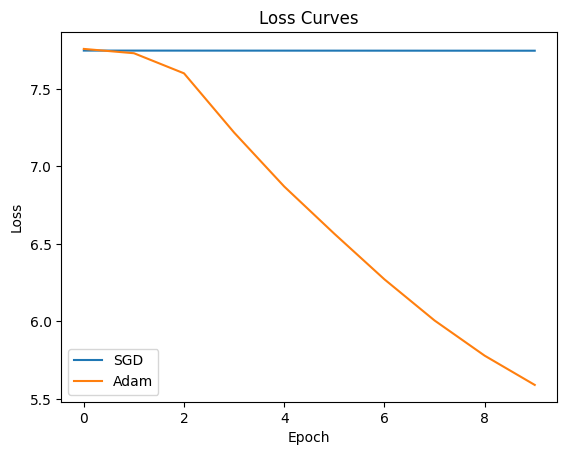

SGD Test Accuracy: 0.0
Adam Test Accuracy: 0.0
SGD and Adam performed similarly.


In [163]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_np, y_preprocessed, test_size=0.2, random_state=42)

# Function to train the model with a specific optimizer
def train_model(optimizer, X_train, y_train, epochs=10):
  model = keras.Sequential([
      layers.Dense(128, activation='relu', input_shape=input_shape),
      layers.Dense(64, activation='relu'),
      layers.Dense(len(df['gpuName'].unique()), activation='softmax')
  ])

  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  history = model.fit(X_train, y_train, epochs=epochs, verbose=0)
  return model, history

# Train the model with SGD
sgd_model, sgd_history = train_model(SGD(learning_rate=0.01), X_train, y_train)

# Train the model with Adam
adam_model, adam_history = train_model(Adam(learning_rate=0.001), X_train, y_train)

# Plot the loss curves
plt.plot(sgd_history.history['loss'], label='SGD')
plt.plot(adam_history.history['loss'], label='Adam')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

# Evaluate the models on the test set
sgd_loss, sgd_accuracy = sgd_model.evaluate(X_test, y_test, verbose=0)
adam_loss, adam_accuracy = adam_model.evaluate(X_test, y_test, verbose=0)

print("SGD Test Accuracy:", sgd_accuracy)
print("Adam Test Accuracy:", adam_accuracy)

if sgd_accuracy > adam_accuracy:
  print("SGD performed better than Adam.")
elif adam_accuracy > sgd_accuracy:
  print("Adam performed better than SGD.")
else:
  print("SGD and Adam performed similarly.")
